# OpenFOAM PMDI plots

This program plots spray targeting and width data comparing different nozzles and propellants.
Currently the data is manually obtained from Paraview, but in future could be automated by being read from slice CSV/VTK files.

    
    @author Daniel Duke <daniel.duke@monash.edu>
    @copyright (c) 2020 LTRAC
    @license GPL-3.0+
    @version 0.0.1
    @date 19/11/2022
        __   ____________    ___    ______
       / /  /_  ____ __  \  /   |  / ____/
      / /    / /   / /_/ / / /| | / /
     / /___ / /   / _, _/ / ___ |/ /_________
    /_____//_/   /_/ |__\/_/  |_|\__________/

    Laboratory for Turbulence Research in Aerospace & Combustion (LTRAC)
    Monash University, Australia


In [1]:
# Load modules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
# independent variables
nozz=np.hstack([np.arange(1,10)]*6)
prop=np.hstack([[134.15]*9,[152.15]*9,[1234.15]*9,[134]*9,[152]*9,[1234]*9])
etha=np.hstack([[15]*9*3,[0]*9*3])
diam=np.array([0.33,0.467,0.234,0.33,0.33,0.404,0.285,0.33,0.3]*6)
leng=np.array([1.2,1.7,0.85,0.6,2.4,1.47,1.04,0.3,0.8]*6)
ld=leng/diam

In [3]:
def propName(p):
    s=''
    if np.round(p,0)==1234:
        s+='HFO-1234ze(E)'
    else:
        s+='HFA-%.0fa' % np.round(p,0)
    if p-np.round(p,0) != 0:
        s+=' %.0f%%' % (100*(p-np.round(p,0)))
    return s

In [4]:
# dependant variables
# This data was exported manually from Paraview.
# process and details are explained in the Google Doc.
# https://docs.google.com/document/d/1E_pS6D2Zi7-QB6yUZAFHzBU05NuAhdVjmXVKPHKvfQ0/edit#

# Y-displacement of a vector from the nozzle orifice exit to the furthest extent of the yMean<=0.5 isosurface.
dY=np.array([-0.0227999780327082,\
-0.0457999967038631,\
-0.0175900012254715,\
-0.0303799994289875,\
-0.0227999947965145,\
-0.0330299884080887,\
-0.0297999996691942,\
-0.0322999991476536,\
-0.0362999998033047,\
-0.0227999985218048,\
-0.0492999739944935,\
-0.0130899995565414,\
-0.0368800014257431,\
-0.0372999981045723,\
-0.030029995366931,\
-0.0287999976426363,\
-0.0217999890446663,\
-0.0397999994456768,\
-0.048799991607666,\
-0.0614985935389996,\
-0.0275900010019541,\
-0.0483799986541271,\
-0.0492999851703644,\
-0.0440299920737743,\
-0.0462999977171421,\
-0.0342999957501888,\
-0.0557942986488342,\
-0.03229999914765,\
-0.0612161345779896,\
-0.0148400003090501,\
-0.0373800024390221,\
-0.0277999993413687,\
-0.0375299900770187,\
-0.0332999974489212,\
np.nan,\
-0.0443000011146069,\
-0.0347999893128872,\
-0.0532991774380207,\
-0.0267999991774559,\
-0.0353800021111965,\
-0.0437999963760376,\
-0.0325299911201,\
-0.0397999994456768,\
-0.0317999981343746,\
-0.0392999984323978,\
-0.051299873739481,\
-0.0612161345779896,\
-0.0310900006443262,\
-0.0498799867928028,\
-0.0492999851703644,\
-0.037529993802309,\
-0.0367999970912933,\
np.nan,\
-0.04279999807477])

# Z-displacement of a vector from the nozzle orifice exit to the furthest extent of the yMean<=0.5 isosurface.
dZ=np.array([-0.00750007899478078,\
-0.00995000172406435,\
-0.00383000005967915,\
-0.00662000337615609,\
-0.00600001774728298,\
-0.0094600347802043,\
-0.00650000339373946,\
-0.00700000254437327,\
-0.00800000224262476,\
-0.00450000027194619,\
-0.0119500048458576,\
-0.00257999985478818,\
-0.00762000074610114,\
-0.00900000706315041,\
-0.00796001777052879,\
-0.00650000479072332,\
-0.00650003924965858,\
-0.00850000139325857,\
-0.011500003747642,\
-0.0137499999254942,\
-0.00583000108599663,\
-0.0106200017035007,\
-0.0110000018030405,\
-0.0119600221514702,\
-0.0100000016391277,\
-0.00850000977516174,\
-0.0120000001043081,\
    -0.00750000542029,\
-0.0139500005170703,\
-0.00332999997772276,\
-0.00812000222504139,\
-0.00499999709427357,\
-0.010460028424859,\
-0.00850001256912947,\
np.nan,\
-0.00950000155717135,\
-0.0100000388920307,\
-0.0115000009536743,\
-0.00550000136718154,\
-0.007620002143085,\
-0.0110000092536211,\
-0.00896002445369959,\
-0.00900000333786011,\
-0.00800001155585051,\
-0.00850000139325857,\
-0.0115000009536743,\
-0.0134500004351139,\
-0.00683000218123198,\
-0.0111200017854571,\
-0.0110000018030405,\
-0.00996001716703177,\
-0.0085000041872263,\
np.nan,\
-0.00849999953061342])

# Cross sectional area of the isosurface of yMean=0.5 at 10mm from the nozzle orifice along a vector parallel
# to the nozzle wall (ie nozzle centreline axis.)
Area=np.array([0.00000717115,\
0.00000697904,\
0.0000036422,\
0.00000612174,\
0.00000409779,\
0.00000835475,\
0.00000575512,\
0.00000681805,\
0.00000543159,\
0.00000460211,\
0.00000617161,\
0.00000343998,\
0.0000054673,\
0.00000314414,\
0.00000681867,\
0.00000422584,\
0.0000056514,\
0.00000467403,\
0.00000422584,\
0.00000532509,\
0.00000252205,\
0.00000439985,\
0.00000249709,\
0.0000063954,\
0.00000452443,\
0.00000644927,\
0.00000325803,\
0.00000667866,\
0.0000100059,\
0.00000480888,\
0.00000800287,\
0.00000623566,\
0.00000983538,\
0.00000778715,\
np.nan,\
0.00000722777,\
0.00000692182,\
0.0000102863,\
0.00000256111,\
0.00000987462,\
0.00000510345,\
0.00000921205,\
0.00000686853,\
0.0000123008,\
0.0000071071,\
0.00000377087,\
0.00000594043,\
0.00000236903,\
0.00000680119,\
0.00000319401,\
0.00000665152,\
0.00000658748,\
np.nan,\
0.00000480209,\
])

# Calculations

In [5]:
# Vector magnitude
dR = np.sqrt(dY**2 + dZ**2)*1000 # mm
# Spray angle, degrees
theta = np.arctan(dZ/dY)*180/np.pi
# Width, based on axisymmetric area assumption.
# A = 0.5*pi*D^2, thus width ~ sqrt(2A/pi) 
width = np.sqrt(2*Area/np.pi)*1000 # mm

# Making plots
## Plot against diameter and propellant type

<IPython.core.display.Javascript object>


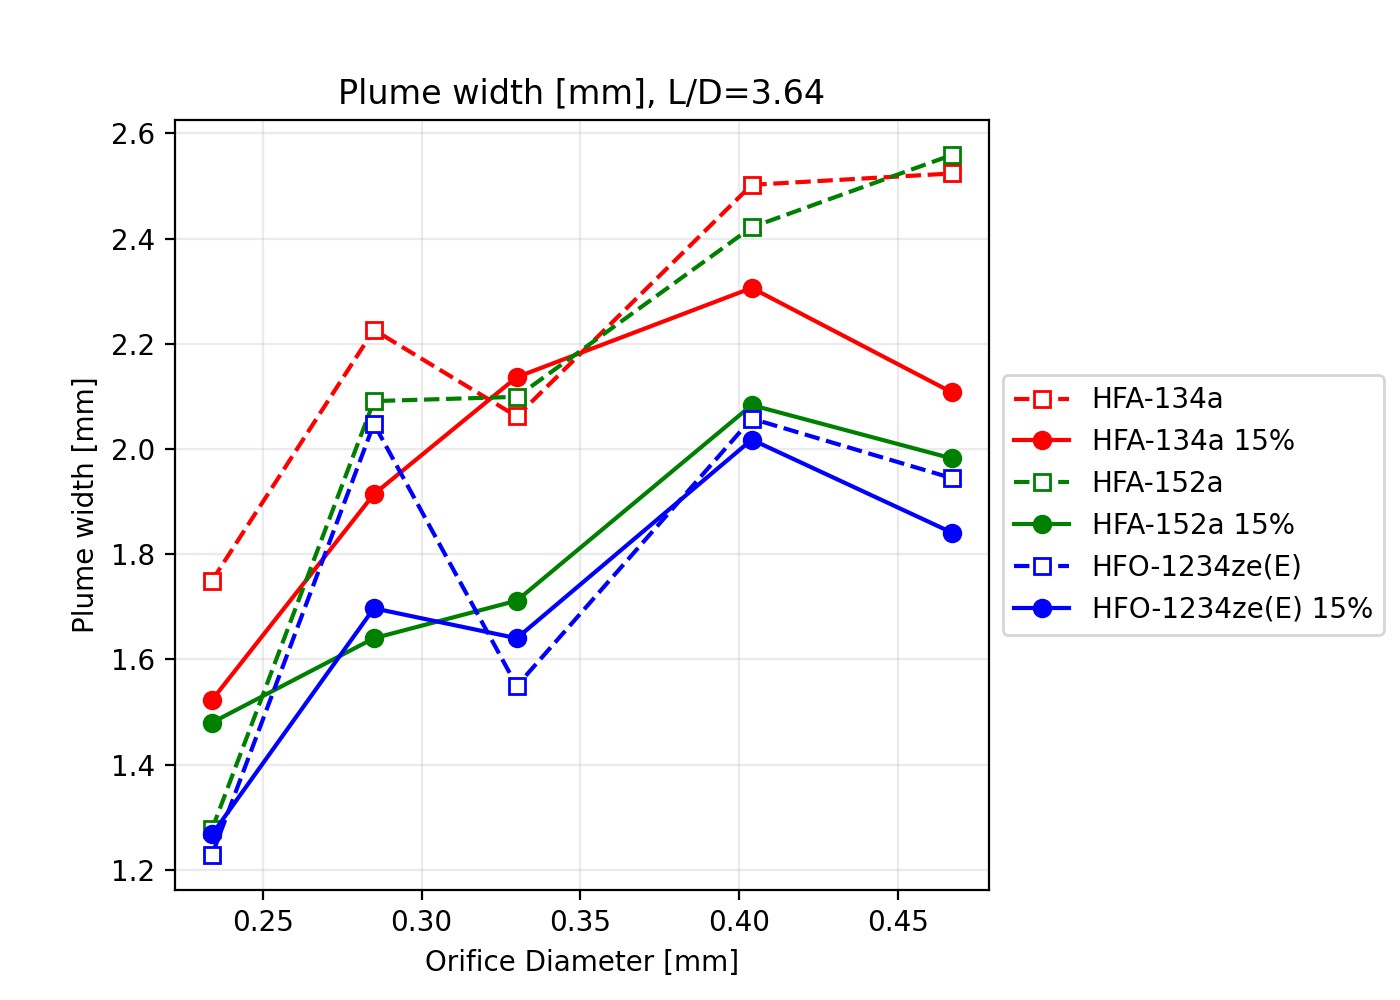

<IPython.core.display.Javascript object>


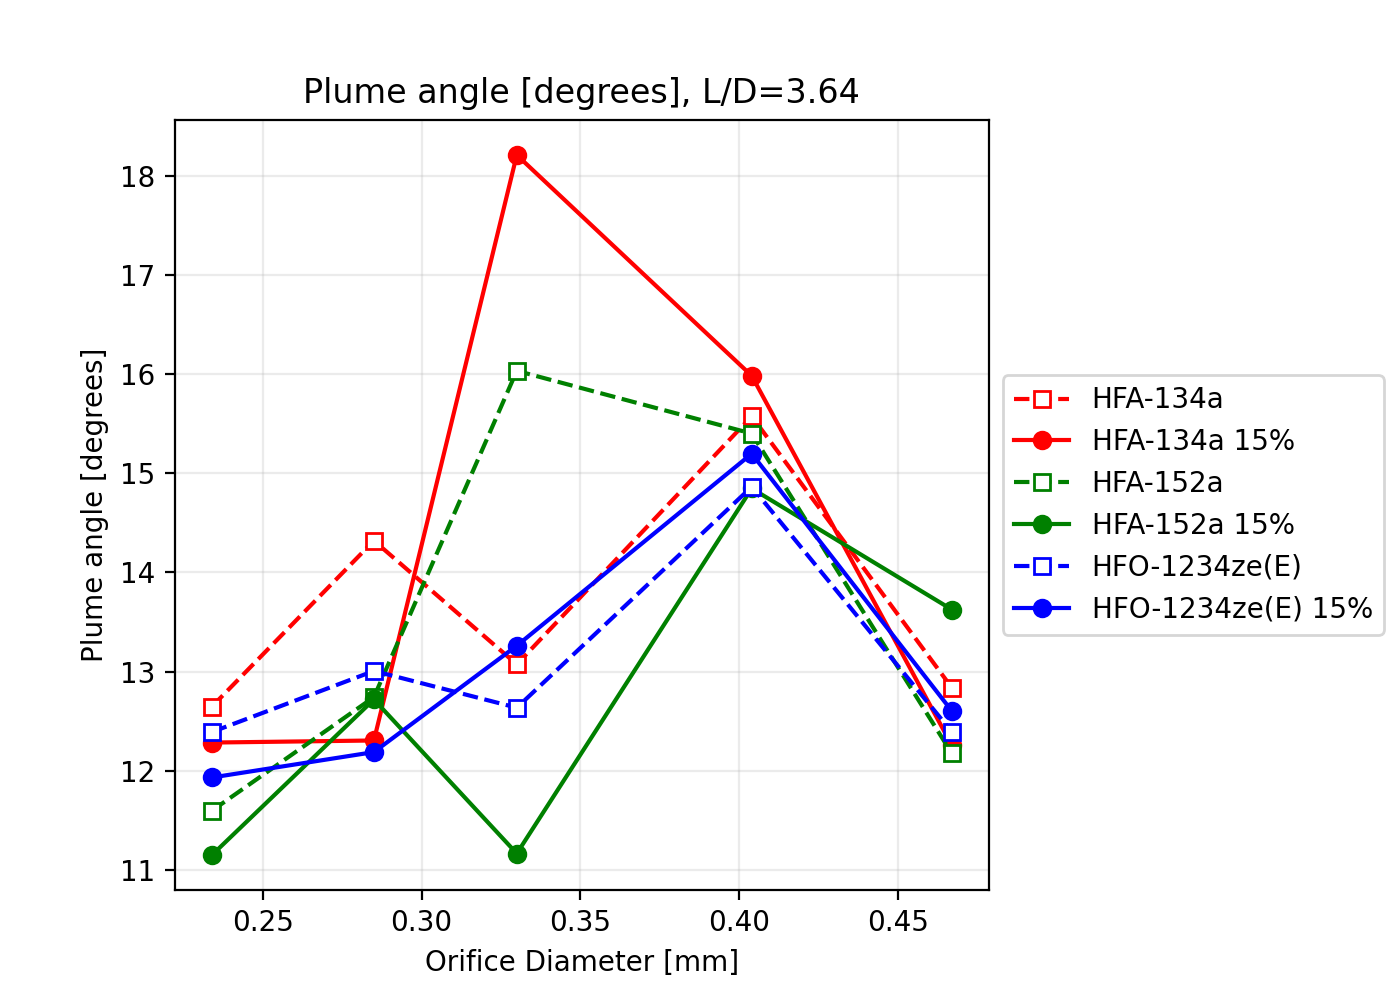

<IPython.core.display.Javascript object>


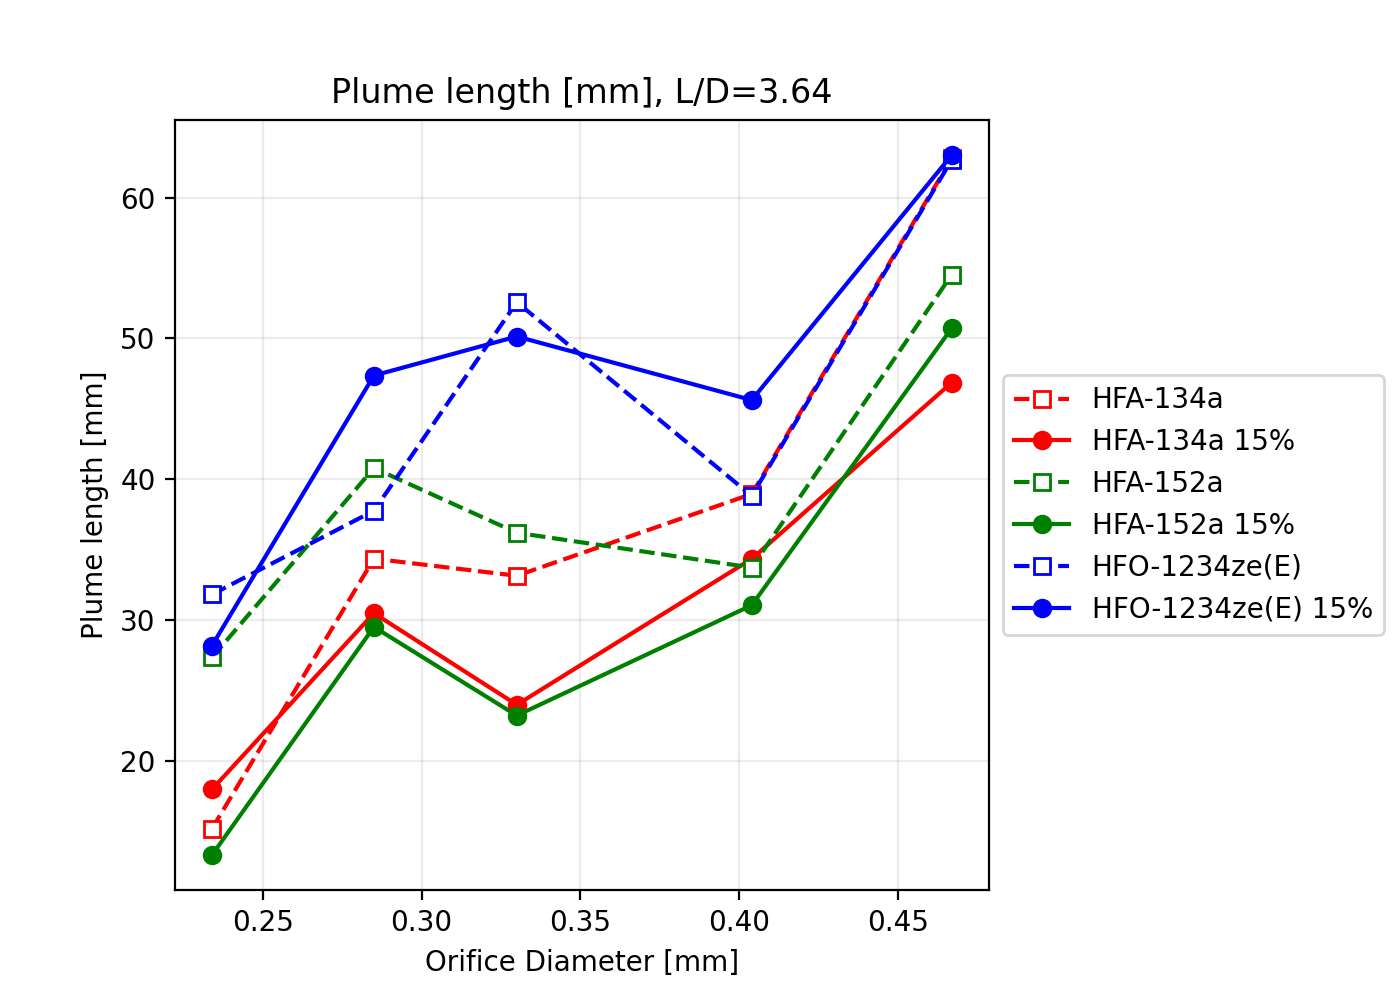

<IPython.core.display.Javascript object>


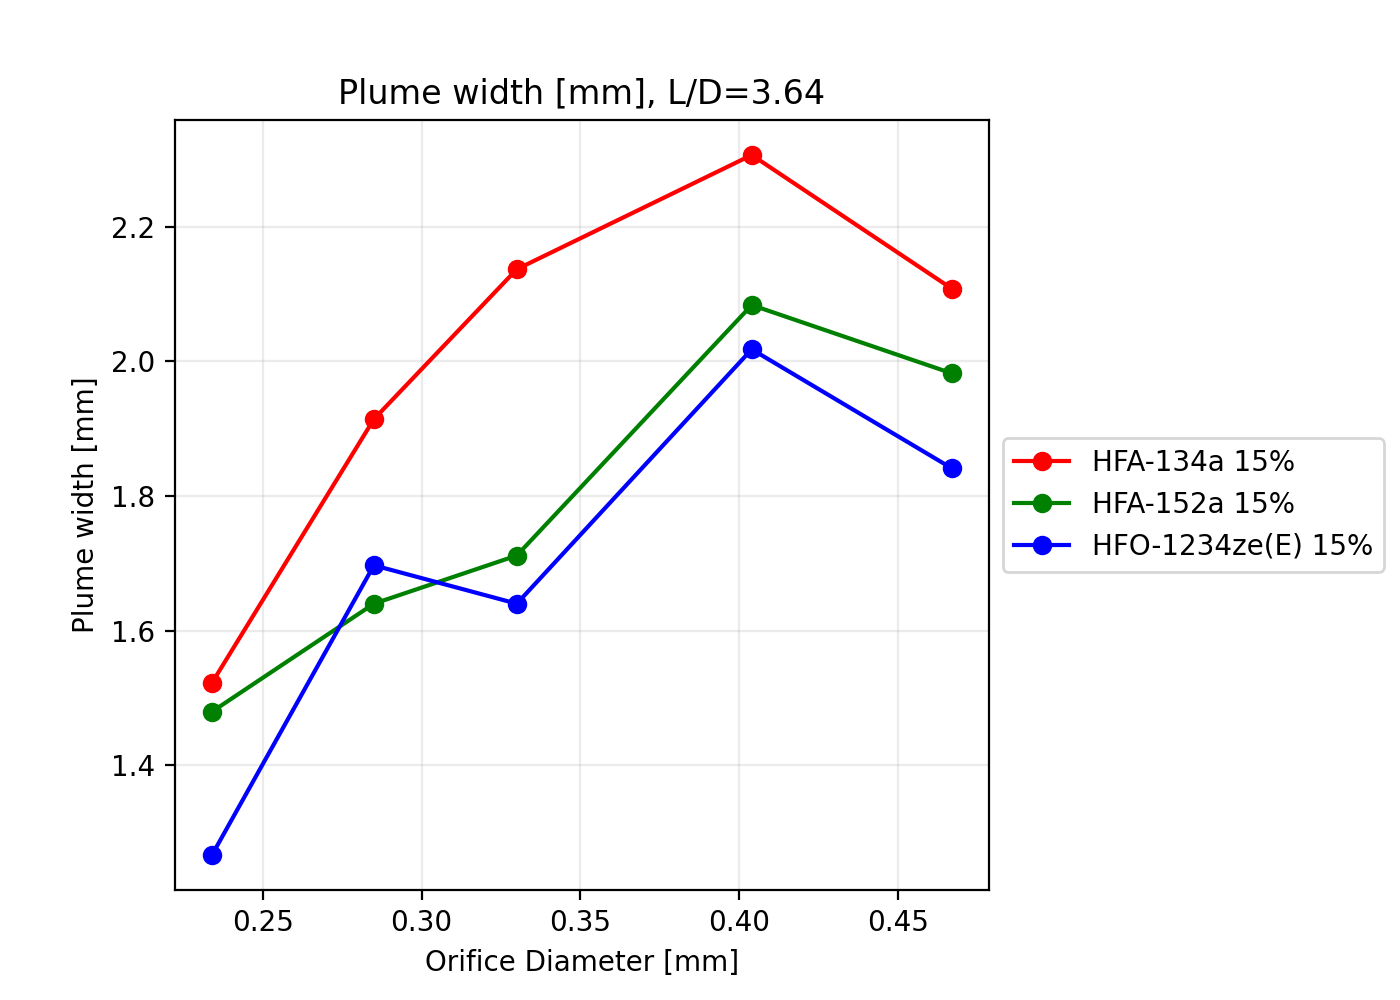

<IPython.core.display.Javascript object>


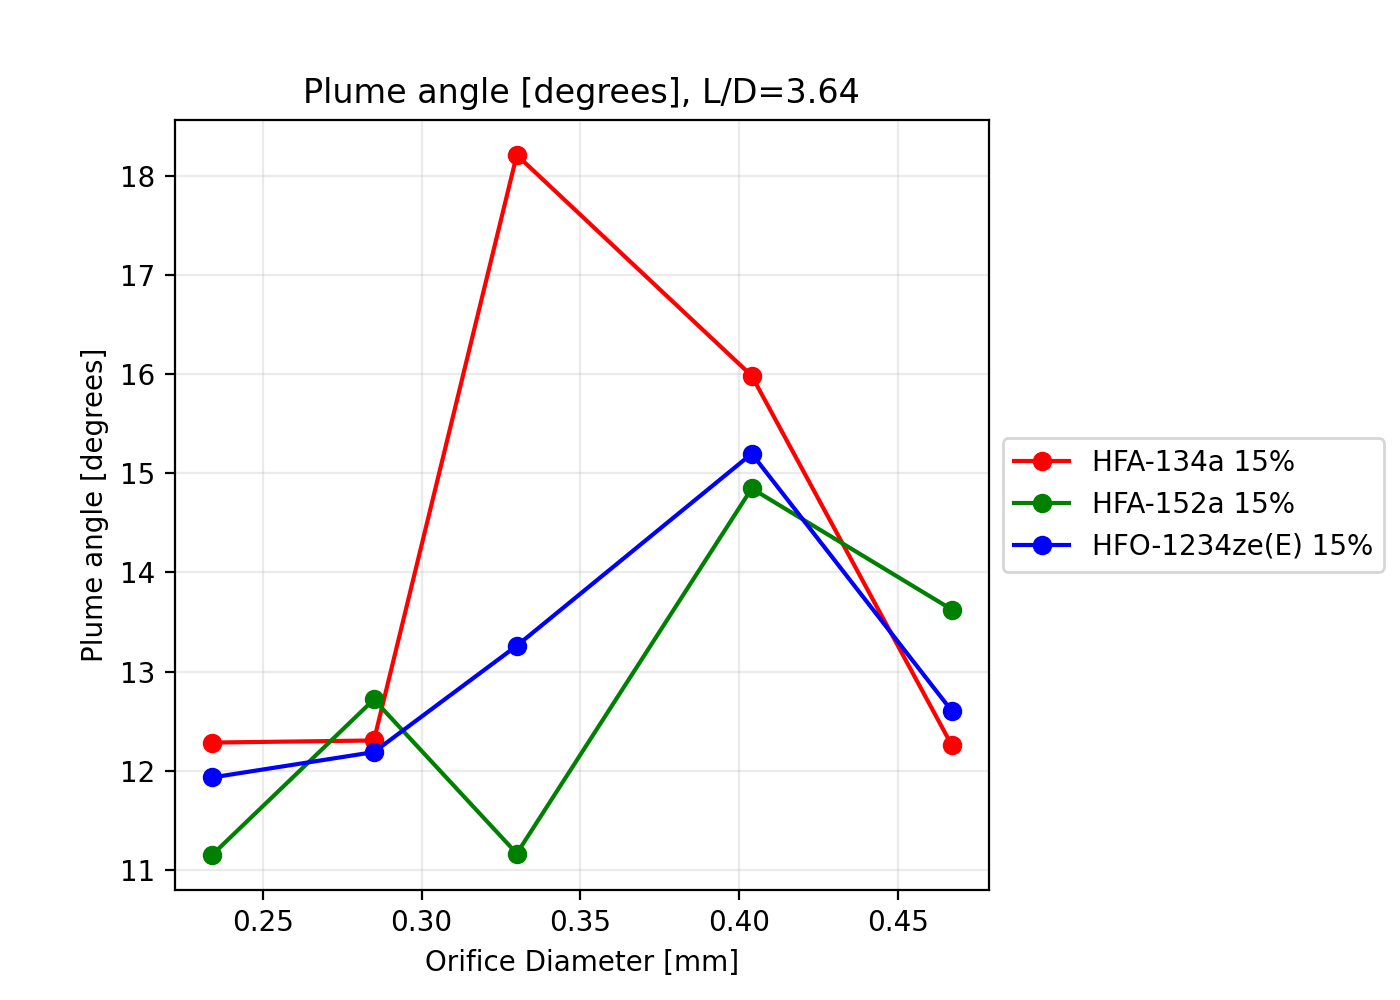

<IPython.core.display.Javascript object>


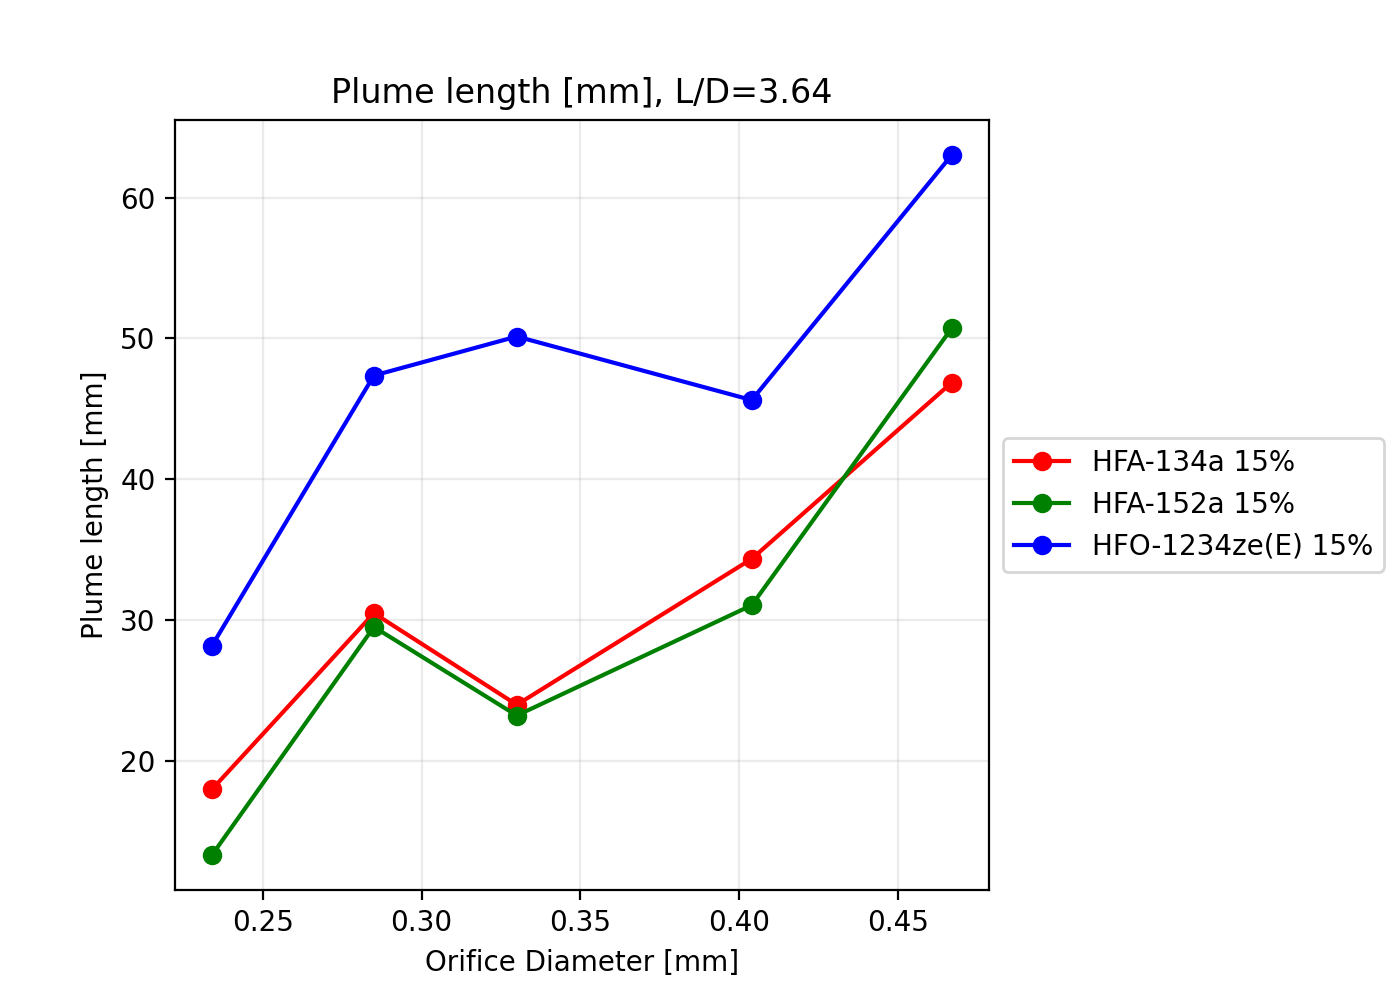

In [6]:
for showPure in [True,False]:
    for dependentVariable,varName in zip([width,theta,dR],\
           ['Plume width [mm]','Plume angle [degrees]','Plume length [mm]']):

        fig=plt.figure(figsize=(7,5))
        ax=fig.add_subplot(111)
        plt.grid(alpha=.25)

        for p in np.unique(prop):
            ldfilter = np.abs(ld-3.636363)<.1 # filter by LD ratio
            i = np.where((prop==p)&(ldfilter))[0] # filter by propellant
            i = i[np.argsort(diam[i])] # sort by diameter

            if np.round(p,0)==134:  c='r'
            elif np.round(p,0)==152:c='g'
            elif np.round(p,0)==1234:c='b'
            else:c='k'
            mfc=None; ls=None; m='o'
            if p-np.round(p,0) == 0: 
                m='s'
                mfc='w'
                ls='--'

            if (p-np.round(p,0) != 0) or showPure:
                ax.plot(diam[i], dependentVariable[i],label=propName(p),c=c,marker=m,mfc=mfc,ls=ls)

        plt.xlabel('Orifice Diameter [mm]')
        plt.ylabel(varName)

        # Shrink current axis horizontally
        box = ax.get_position()
        ax.set_position([box.x0, box.y0, box.width * 0.75, box.height])

        # Put a legend to the right of the current axis
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));
        plt.title(varName+', L/D=3.64')
        
        plt.savefig('%s_LD3.64_pure%s.pdf' % (varName.replace(' ','-').replace('[','').replace(']',''),\
                                              showPure))


## Plot against length and propellant type

<IPython.core.display.Javascript object>


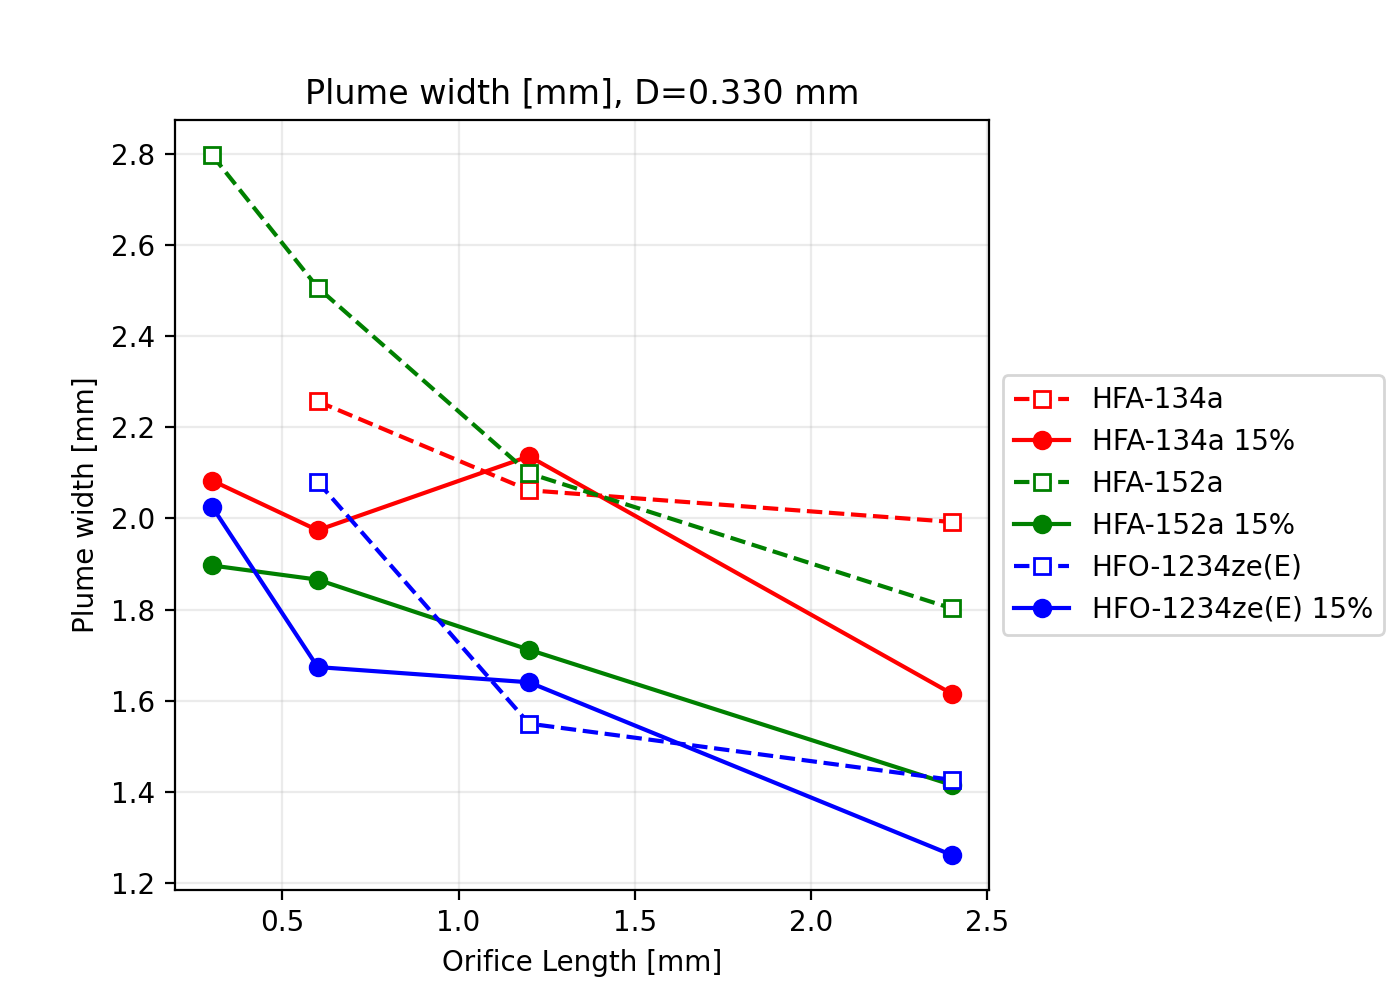

<IPython.core.display.Javascript object>


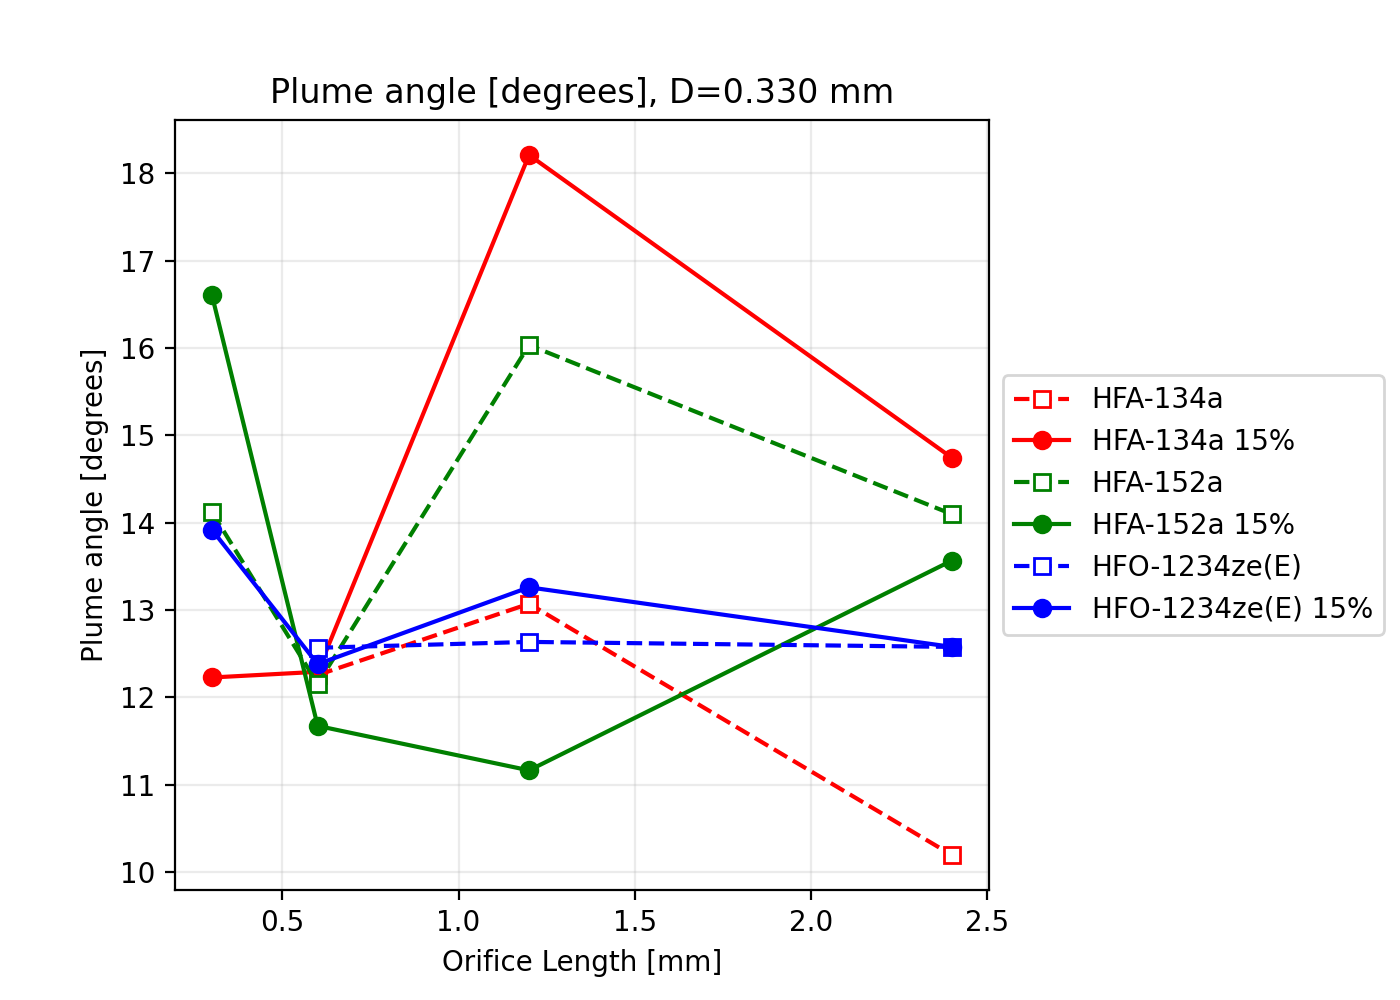

<IPython.core.display.Javascript object>


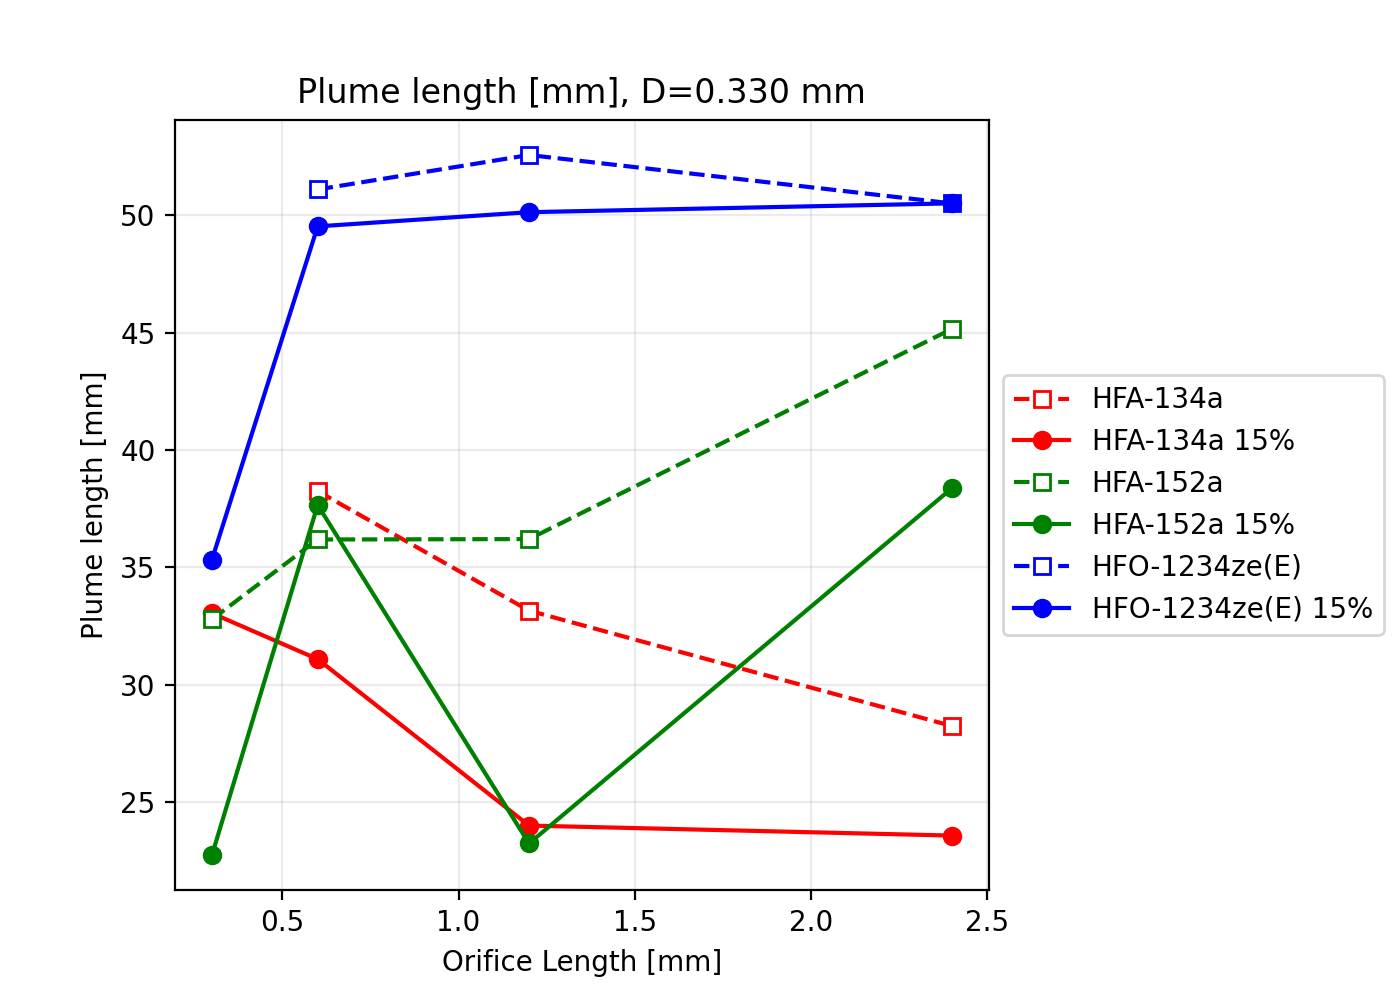

<IPython.core.display.Javascript object>


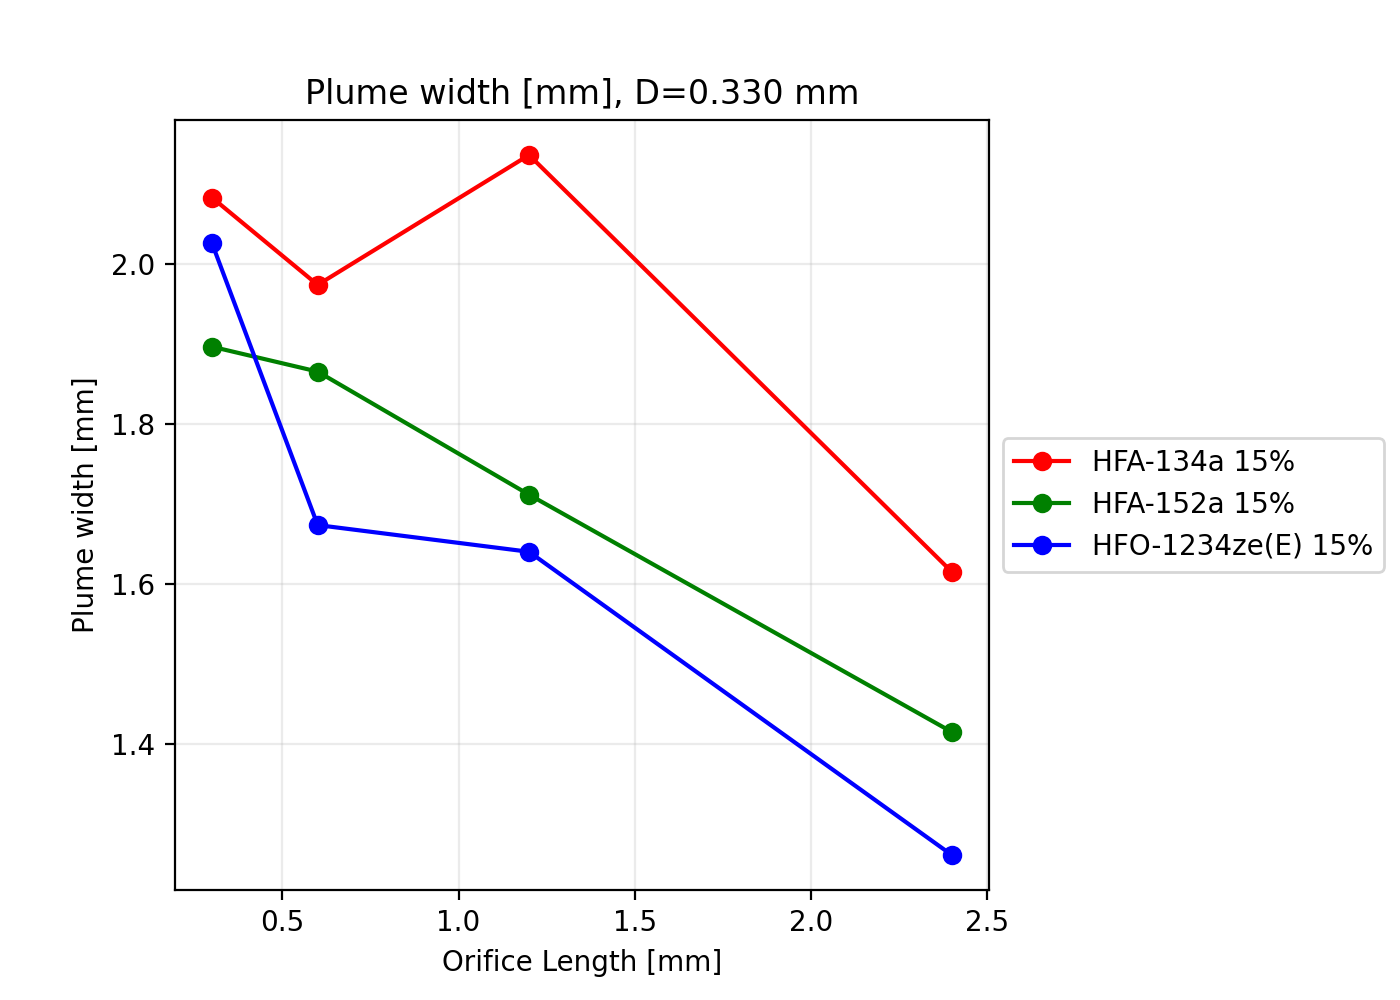

<IPython.core.display.Javascript object>


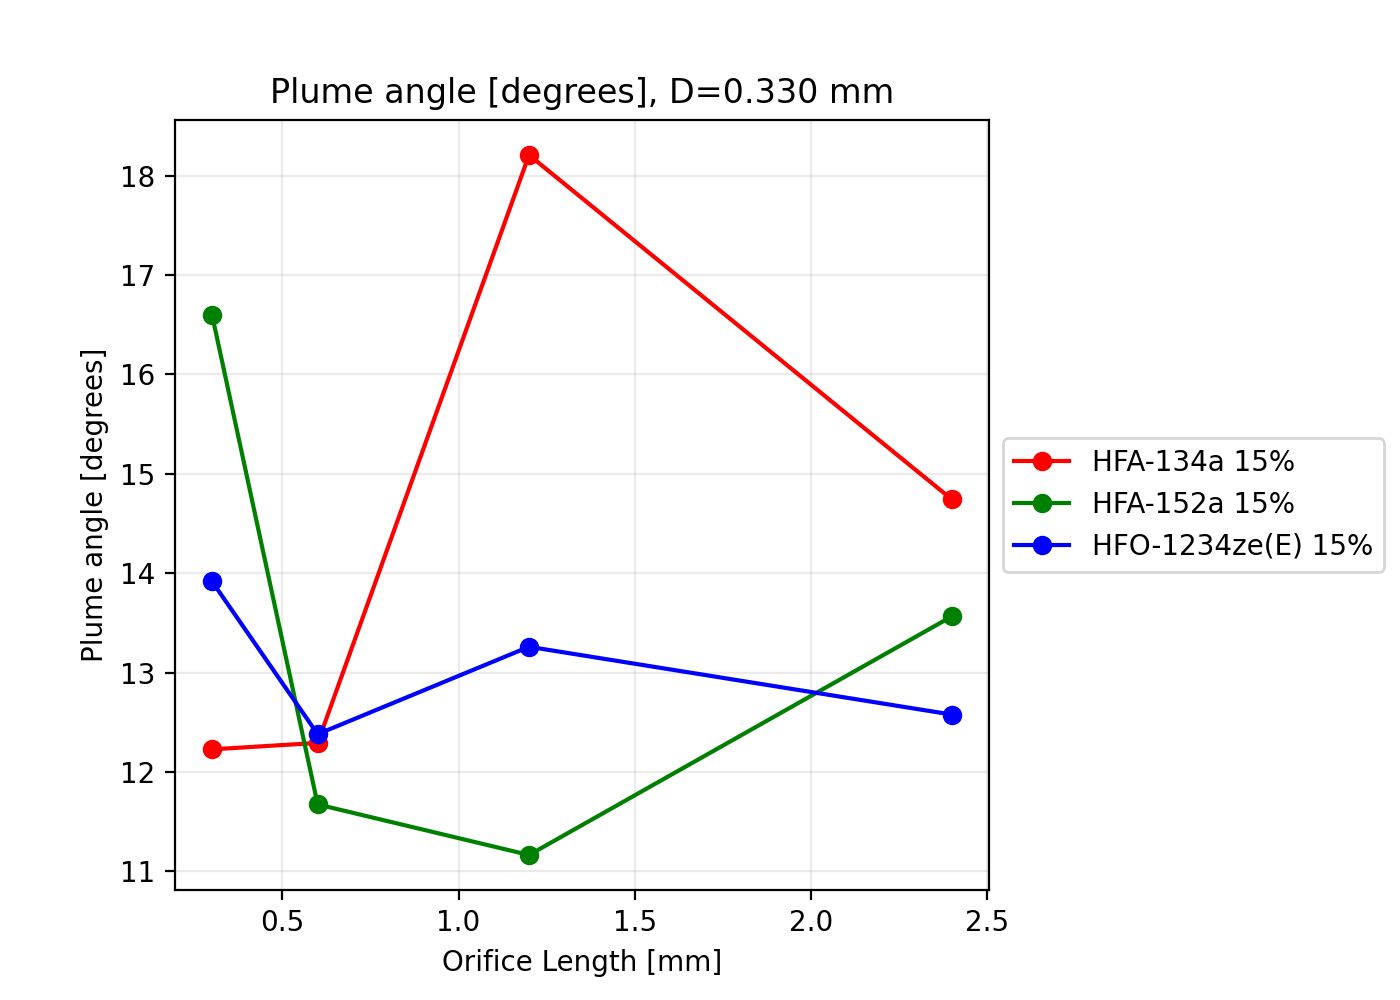

<IPython.core.display.Javascript object>


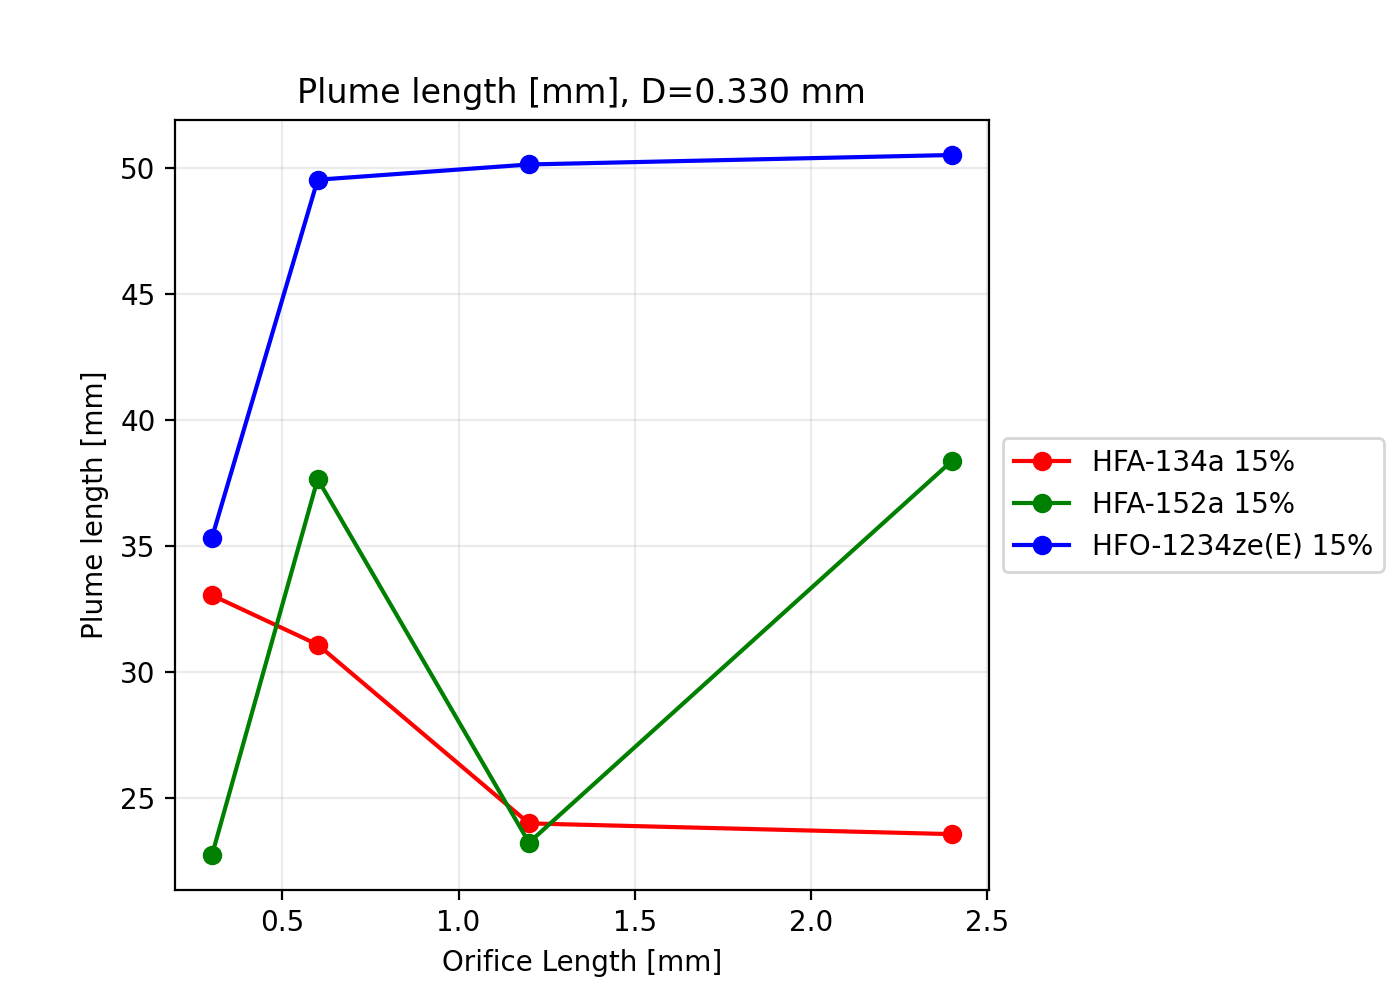

In [7]:
for showPure in [True,False]:
    for dependentVariable,varName in zip([width,theta,dR],\
                ['Plume width [mm]','Plume angle [degrees]','Plume length [mm]']):

        fig=plt.figure(figsize=(7,5))
        ax=fig.add_subplot(111)
        plt.grid(alpha=.25)

        for p in np.unique(prop):
            ldfilter = np.abs(diam-0.33)<.01 # filter by diameter
            i = np.where((prop==p)&(ldfilter))[0] # filter by propellant
            i = i[np.argsort(leng[i])] # sort by length

            if np.round(p,0)==134:  c='r'
            elif np.round(p,0)==152:c='g'
            elif np.round(p,0)==1234:c='b'
            else:c='k'
            mfc=None; ls=None; m='o'
            if p-np.round(p,0) == 0: 
                m='s'
                mfc='w'
                ls='--'

            if (p-np.round(p,0) != 0) or showPure:
                ax.plot(leng[i], dependentVariable[i],label=propName(p),c=c,marker=m,mfc=mfc,ls=ls)

        plt.xlabel('Orifice Length [mm]')
        plt.ylabel(varName)

        # Shrink current axis horizontally
        box = ax.get_position()
        ax.set_position([box.x0, box.y0, box.width * 0.75, box.height])

        # Put a legend to the right of the current axis
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));
        plt.title(varName+', D=0.330 mm')
        
        plt.savefig('%s_D330_pure%s.pdf' % (varName.replace(' ','-').replace('[','').replace(']',''),\
                                              showPure))
